# Họ và Tên
# MSSV

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng Bilateral filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Canny Edge Detection để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi kênh màu theo thứ tự (ví dụ: BGR → BRG) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu YCrCb và tách riêng 3 kênh Y, Cr, Cb, lưu thành ảnh grayscale tương ứng (`[ten_anh]_Y.jpg`, `[ten_anh]_Cr.jpg`, `[ten_anh]_Cb.jpg`). (0.5 điểm)


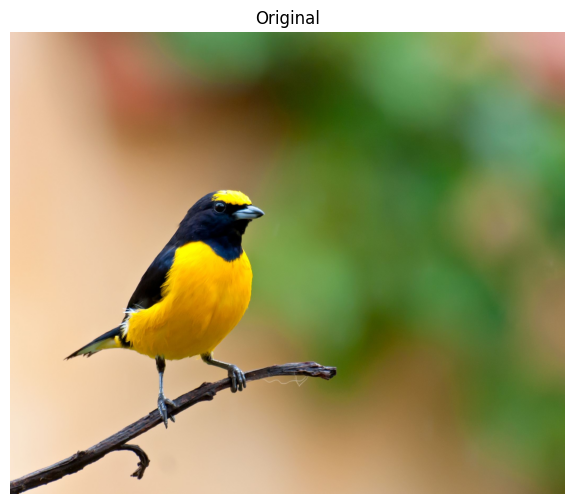

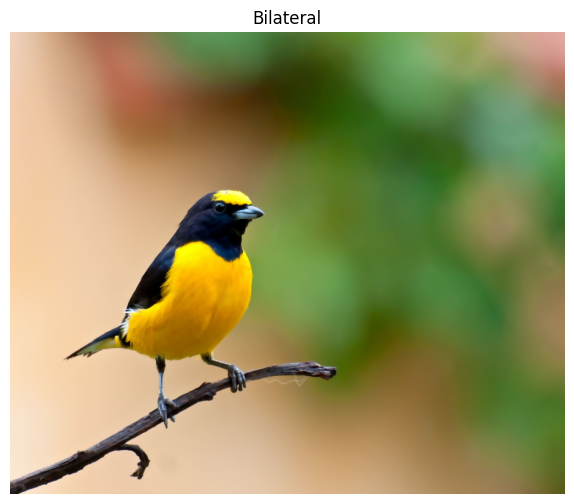

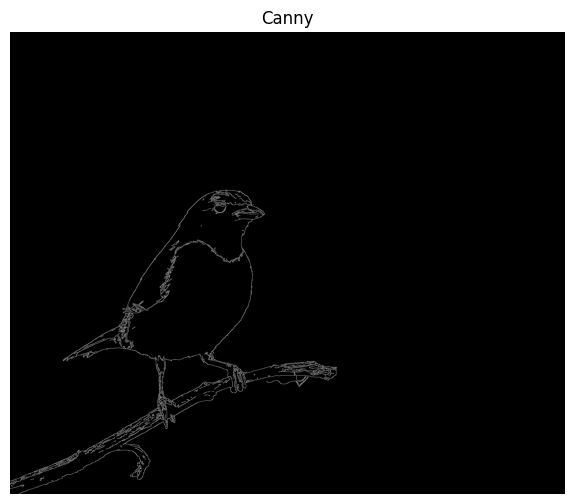

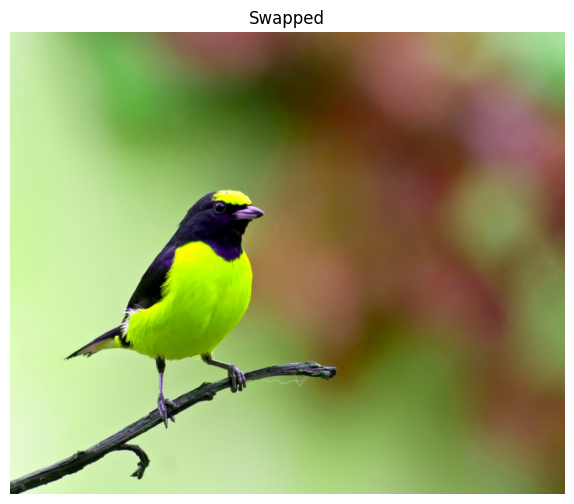

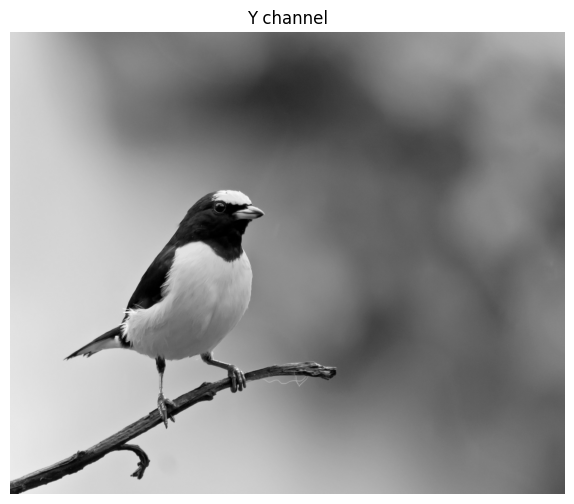

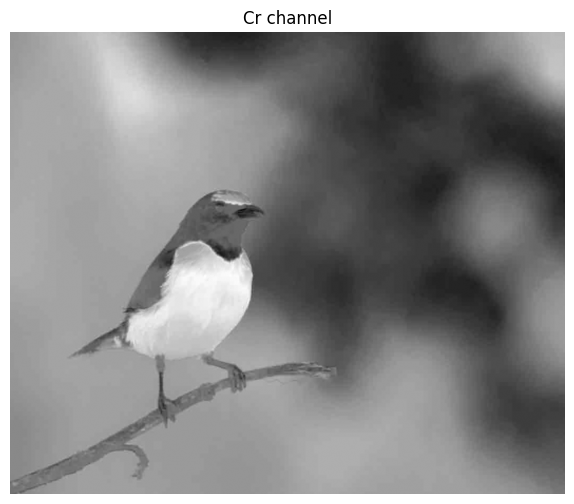

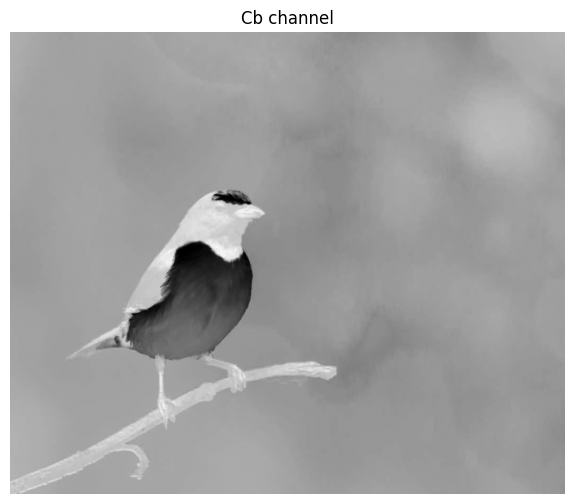

In [6]:
# Câu 1: Xử lý ảnh với OpenCV

import cv2
import numpy as np

image_name = 'bird.jpg'
img = cv2.imread(image_name)

bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
cv2.imwrite(f"{image_name.split('.')[0]}_bilateral.jpg", bilateral)

edges = cv2.Canny(img, 100, 200)
cv2.imwrite(f"{image_name.split('.')[0]}_canny.jpg", edges)

swapped = img.copy()
swapped[:, :, [1, 2]] = swapped[:, :, [2, 1]]  
cv2.imwrite(f"{image_name.split('.')[0]}_swapped.jpg", swapped)

ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(ycrcb)
cv2.imwrite(f"{image_name.split('.')[0]}_Y.jpg", Y)
cv2.imwrite(f"{image_name.split('.')[0]}_Cr.jpg", Cr)
cv2.imwrite(f"{image_name.split('.')[0]}_Cb.jpg", Cb)
%matplotlib inline
import matplotlib.pyplot as plt

def show_img(title, img, cmap=None):
	plt.figure(figsize=(8, 6))
	if img.ndim == 2:
		plt.imshow(img, cmap=cmap)
	else:
		plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
	plt.title(title)
	plt.axis('off')
	plt.show()

show_img("Original", img)
show_img("Bilateral", bilateral)
show_img("Canny", edges, cmap='gray')
show_img("Swapped", swapped)
show_img("Y channel", Y, cmap='gray')
show_img("Cr channel", Cr, cmap='gray')
show_img("Cb channel", Cb, cmap='gray')

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật biến đổi hình học và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Phóng to ảnh (Zoom bằng resize) (0.5 điểm)  
* Xoay ảnh (góc ngẫu nhiên từ 0–360 độ) (0.5 điểm)  
* Lật ảnh ngang (0.5 điểm)  
* Lật ảnh dọc (0.5 điểm)  
* Cắt ảnh (crop ngẫu nhiên vùng giữa ảnh) (0.5 điểm)  
* Thêm viền (padding màu ngẫu nhiên) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* Z: Zoom  
* T: Rotate  
* H: Horizontal Flip  
* V: Vertical Flip  
* C: Crop  
* P: Padding (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_crop_cat.jpg`, `result_rotate_image1.jpg` (0.5 điểm)


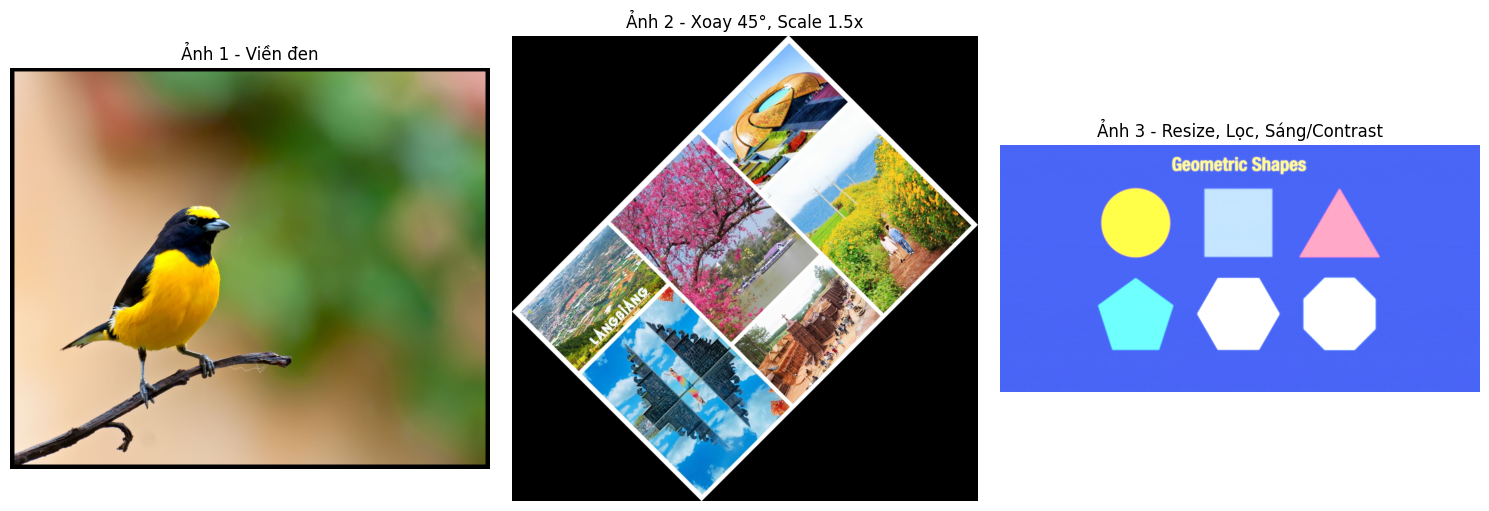

 Chọn các kỹ thuật xử lý (nhập số, cách nhau bằng dấu phẩy):
1. Phóng to ảnh (resize)
2. Xoay ảnh (góc ngẫu nhiên)
3. Lật ảnh ngang
4. Lật ảnh dọc
5. Cắt vùng giữa ảnh
6. Thêm viền màu ngẫu nhiên
✅ Ảnh sau xử lý đã lưu tại: output/processed_bird.JPG
✅ Ảnh sau xử lý đã lưu tại: output/processed_dalat.JPG
✅ Ảnh sau xử lý đã lưu tại: output/processed_geometric.png


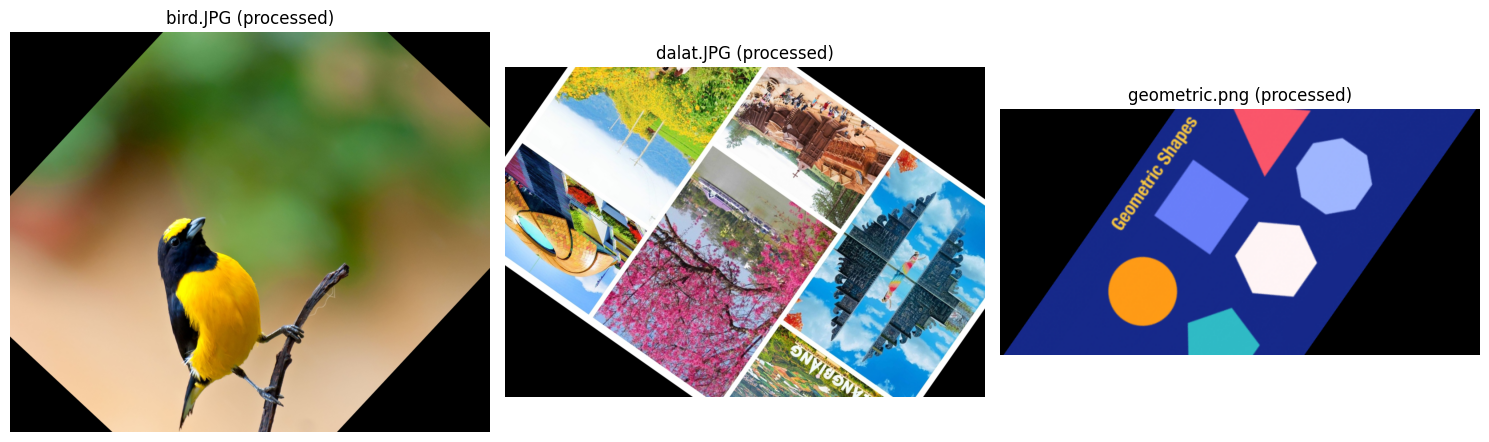

In [16]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('bird.jpg')
img2 = cv2.imread('dalat.jpg')
img3 = cv2.imread('geometric.png')

if img1 is None or img2 is None or img3 is None:
    print(" Một hoặc nhiều ảnh không được tìm thấy. Kiểm tra tên ảnh.")
    exit()

def bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img1_border = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=(0, 0, 0))

(h, w) = img2.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.5)
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))
M[0, 2] += (new_w / 2) - center[0]
M[1, 2] += (new_h / 2) - center[1]
img2_rotated = cv2.warpAffine(img2, M, (new_w, new_h))

img3_resized = cv2.resize(img3, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
img3_filtered = cv2.bilateralFilter(img3_resized, d=9, sigmaColor=75, sigmaSpace=75)
alpha = 1.5
beta = 40
img3_adjusted = cv2.convertScaleAbs(img3_filtered, alpha=alpha, beta=beta)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(bgr_to_rgb(img1_border))
plt.title("Ảnh 1 - Viền đen")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bgr_to_rgb(img2_rotated))
plt.title("Ảnh 2 - Xoay 45°, Scale 1.5x")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bgr_to_rgb(img3_adjusted))
plt.title("Ảnh 3 - Resize, Lọc, Sáng/Contrast")
plt.axis('off')

plt.tight_layout()
plt.show()
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt

input_image_names = ["bird.JPG", "dalat.JPG", "geometric.png"]

def zoom_image(image, scale=2.0):
    height, width = image.shape[:2]
    return cv2.resize(image, (int(width * scale), int(height * scale)))

def rotate_image(image):
    angle = random.randint(0, 360)
    height, width = image.shape[:2]
    M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    return cv2.warpAffine(image, M, (width, height))

def flip_horizontal(image):
    return cv2.flip(image, 1)

def flip_vertical(image):
    return cv2.flip(image, 0)

def crop_center(image):
    height, width = image.shape[:2]
    new_h, new_w = int(height * 0.5), int(width * 0.5)
    start_y = height // 2 - new_h // 2
    start_x = width // 2 - new_w // 2
    return image[start_y:start_y + new_h, start_x:start_x + new_w]

def add_padding(image):
    top, bottom, left, right = 20, 20, 20, 20
    color = [random.randint(0, 255) for _ in range(3)]
    return cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

def print_menu():
    print(" Chọn các kỹ thuật xử lý (nhập số, cách nhau bằng dấu phẩy):")
    print("1. Phóng to ảnh (resize)")
    print("2. Xoay ảnh (góc ngẫu nhiên)")
    print("3. Lật ảnh ngang")
    print("4. Lật ảnh dọc")
    print("5. Cắt vùng giữa ảnh")
    print("6. Thêm viền màu ngẫu nhiên")

def apply_transformations(image, choices):
    for choice in choices:
        if choice == "1":
            image = zoom_image(image)
        elif choice == "2":
            image = rotate_image(image)
        elif choice == "3":
            image = flip_horizontal(image)
        elif choice == "4":
            image = flip_vertical(image)
        elif choice == "5":
            image = crop_center(image)
        elif choice == "6":
            image = add_padding(image)
    return image

print_menu()
user_input = input("👉 Nhập lựa chọn (ví dụ: 1,2,5): ")
selected_ops = user_input.strip().split(",")

os.makedirs("output", exist_ok=True)

processed_images = [] 
titles = []           

for name in input_image_names:
    if not os.path.exists(name):
        print(f" Không tìm thấy ảnh: {name}")
        continue

    image = cv2.imread(name)
    if image is None:
        print(f" Không thể đọc ảnh: {name}")
        continue

    result_image = apply_transformations(image, selected_ops)

    output_name = f"output/processed_{name}"
    cv2.imwrite(output_name, result_image)
    print(f"✅ Ảnh sau xử lý đã lưu tại: {output_name}")


    result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    processed_images.append(result_rgb)
    titles.append(f"{name} (processed)")

plt.figure(figsize=(15, 5))
for i, img in enumerate(processed_images):
    plt.subplot(1, len(processed_images), i + 1)
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Thêm viền đen 20 pixel cho ảnh đầu tiên. (0.5 điểm)  
* Xoay ảnh thứ hai 45 độ và phóng to 1.5 lần. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 4 lần, sau đó áp dụng Bilateral Filter với tham số tùy chọn. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba theo công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.6, 2.0], \quad \beta \in [-60, 60]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


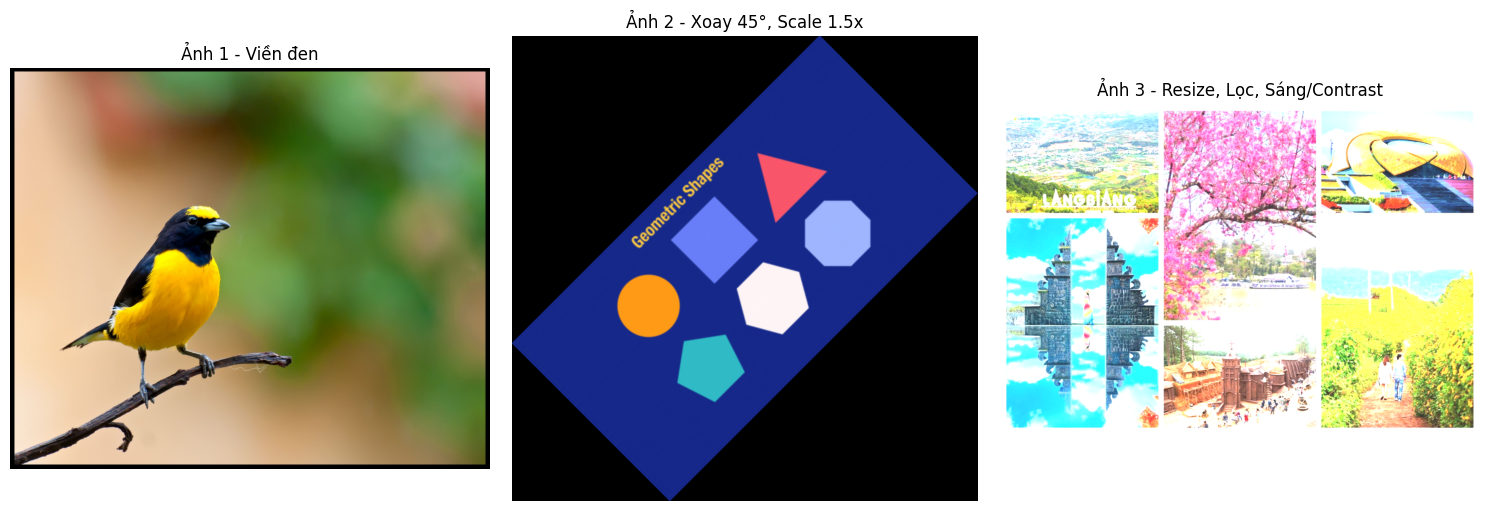

In [14]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('bird.jpg')
img2 = cv2.imread('geometric.png')
img3 = cv2.imread('dalat.jpg')

if img1 is None or img2 is None or img3 is None:
    print(" Một hoặc nhiều ảnh không được tìm thấy. Kiểm tra tên ảnh.")
    exit()

def bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img1_border = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=(0, 0, 0))

(h, w) = img2.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.5)
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))
M[0, 2] += (new_w / 2) - center[0]
M[1, 2] += (new_h / 2) - center[1]
img2_rotated = cv2.warpAffine(img2, M, (new_w, new_h))

img3_resized = cv2.resize(img3, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
img3_filtered = cv2.bilateralFilter(img3_resized, d=9, sigmaColor=75, sigmaSpace=75)
alpha = 1.5
beta = 40
img3_adjusted = cv2.convertScaleAbs(img3_filtered, alpha=alpha, beta=beta)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(bgr_to_rgb(img1_border))
plt.title("Ảnh 1 - Viền đen")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bgr_to_rgb(img2_rotated))
plt.title("Ảnh 2 - Xoay 45°, Scale 1.5x")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bgr_to_rgb(img3_adjusted))
plt.title("Ảnh 3 - Resize, Lọc, Sáng/Contrast")
plt.axis('off')

plt.tight_layout()
plt.show()


# Chúc các bạn thi may mắn và đạt điểm 10.